In [62]:
import networkx as nx

We will be using the [Dolphin social network](http://www-personal.umich.edu/~mejn/netdata/dolphins.zip). You can find the netwrok in the datasets folder (read the [dolphins.txt](../datasets/dolphins/dolphins.txt) file for more information on the data collection process)

### 1.Picking the right Dolphins
Answer the following questions:

#### (1) Popularity contest
We want to know who the top dolphins are in the network, the real centers of attraction. Using what you learned about centrality from the readings and videos, choose an appropriate centrality measure that will tell us who those dolphins are. Justify your decision and list who the important dolphins are.

#### (2) Relay
Dolphins like passing information around efficiently along the shortest-paths. Among their neighbors who are the most important message relayers in the network? Justify your centrality choice for finding these dolphins.

#### (3) Gossip 
There is a lot smack going around the pod and everyone wants to know if Flipper will be inviting them to the party next week. But gossip takes time travel. Which dolphins are in the best position for getting all the best gossip from around the pod? Justify your centrality choice for finding these dolphins.

In [63]:
G = nx.read_gml("../datasets/dolphins/dolphins.gml")

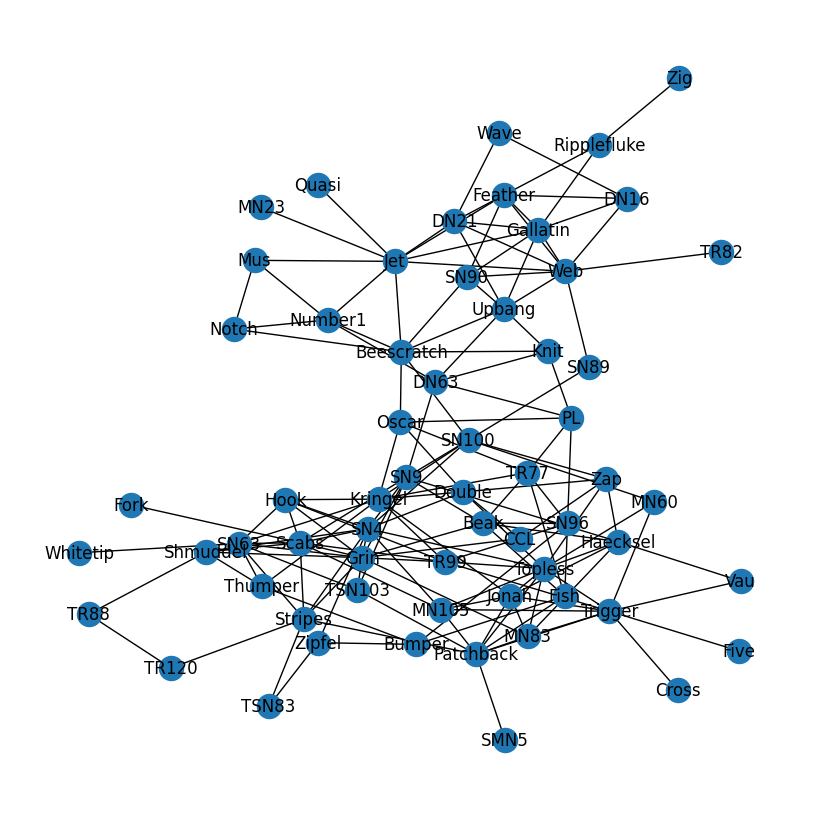

In [64]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,8))
nx.draw_kamada_kawai(G, with_labels=True)

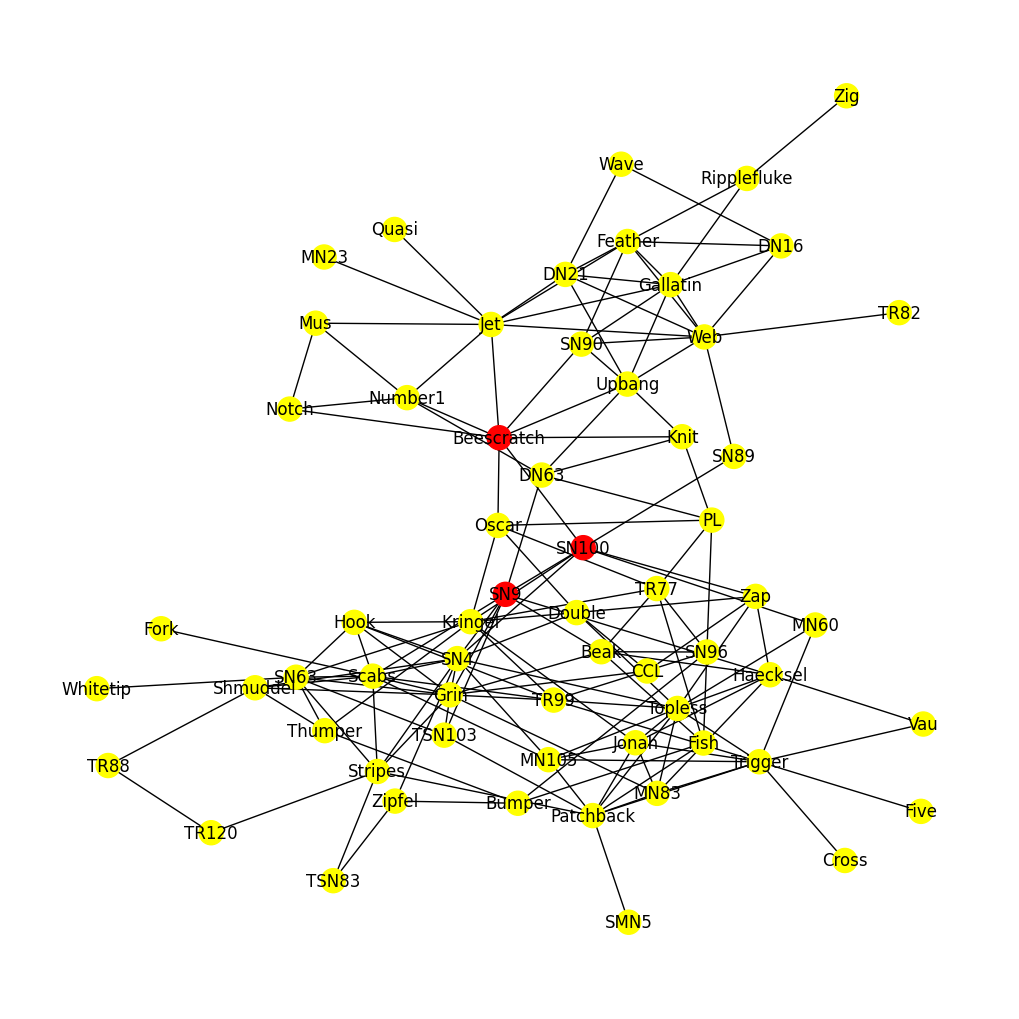

In [71]:
centralities = nx.betweenness_centrality(G)

n = 3

top_n = [node for node, v in sorted(
    centralities.items(), key=lambda item: item[1], reverse=True)][:n]

# Specify node colors
node_colors = [
    'red' if node in top_n else 'yellow' for node in G.nodes()]

# Change the size of the figure
plt.figure(figsize=(10, 10))
# Draw the graph with node colors
nx.draw_kamada_kawai(G, with_labels=True,
                     node_color=node_colors,)

### 2.Can you plot the complementary cumulative distribution function?

First of all, you may be confused between CDF (cumulative distribution function) and CCDF (complementary cumulative distribution function). They are all "cumulative", but the difference is that the former starts from left and the latter starts from the right. 

So, as [Power laws, Pareto distributions and Zipf's law](https://arxiv.org/pdf/cond-mat/0412004v3.pdf) (Fig. 3 (d)) paper explains, plotting the CCDF (complementary cumulative distribution function) is probably the best method to show a heavy-tailed distribution. 

To build the CCDF you start with the unbinned data `x` and `y`. Recall that `y` are the sorted counts associated with each value in `x`. To get the CCDF's value at a particular `x` you want to accumulate all the counts including and following that value. So the first value would just be the sum of all the counts, while the second value would be the sum of all the counts excluding the first one, and so on. In order to represent these values as probabilities, we need to normalize them by dividing all their elements by the largest value (which will always be the first value). This makes sure that the CCDF starts at 1.0 on the log-log plot.

Below, calculate the CCDF and plot it in a similar style (log-log, with symbols). As data, you can use the degree distribution, or the distribution of one of the centrality measures we have seen in class.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([9, 6, 6, 5, 8, 8, 7, 4, 4, 2, 2, 1]))


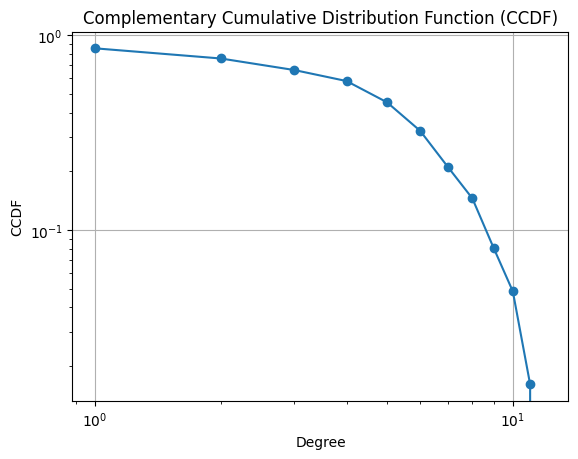

In [68]:
import numpy as np

# Calculate the degree distribution
degree_sequence = sorted([value for _, value in G.degree()], reverse=True)
degree_count = np.unique(degree_sequence, return_counts=True)
degrees = degree_count[0]
frequency = degree_count[1]

# Calculate the CCDF (Complementary Cumulative Distribution Function)
n_nodes = len(G.nodes())
ccdf = 1 - np.cumsum(frequency) / n_nodes

# Plot the CCDF
plt.plot(degrees, ccdf, marker='o', linestyle='-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')
plt.title('Complementary Cumulative Distribution Function (CCDF)')
plt.grid(True)
plt.show()

### 3.Does the friendship paradox hold for the Dolphins network? Motivate your answer quantitatively.


In [67]:
import numpy as np

np.mean([value for node, value in nx.average_neighbor_degree(G).items()]), np.mean(
    [value for node, value in G.degree()])

(6.953560955173859, 5.129032258064516)